In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.4.1


In [2]:
v = [1.,2.,3.,4.]#숫자 뒤에 .을 붙여 정수로 인식하게 함.
tf.reduce_mean(v)#평균값 2.5 출력

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [3]:
tf.square(3) #square은 제곱

<tf.Tensor: shape=(), dtype=int32, numpy=9>

In [4]:
x_data= [1,2,3,4,5]
y_data= [1,2,3,4,5]

W=tf.Variable(2.0)
b=tf.Variable(0.5)

hypothesis = W* x_data + b

In [5]:
W.numpy(), b.numpy()

(2.0, 0.5)

In [6]:
hypothesis.numpy()

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

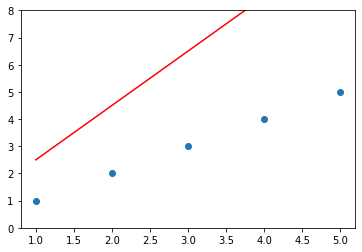

In [7]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data,'o')

plt.plot(x_data, hypothesis,'r-')

plt.ylim(0,8)#그래프 범위 ,y축 0에서 8
plt.show()

In [8]:
#cost
cost = tf.reduce_mean(tf.square(hypothesis-y_data))

In [9]:
with tf.GradientTape() as tape:#컨텍스트 안에서 실행된 모든 변수를 tape에 기록
    hypothesis = W*x_data+b
    cost=  tf.reduce_mean(tf.square(hypothesis-y_data))
    
W_grad, b_grad = tape.gradient(cost,[W,b])#(이 식안의, 이 변수를 찾아서 미분한 다음 왼쪽으로 넘겨라)

W_grad.numpy(), b_grad.numpy()

(25.0, 7.0)

In [10]:
#파라미터 업데이트
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)

b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

(1.75, 0.43)

(0.0, 8.0)

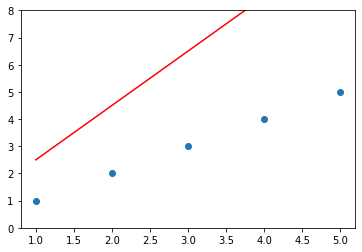

In [11]:
plt.plot(x_data, hypothesis.numpy(),'r-')

plt.plot(x_data, y_data, 'o')
plt.ylim(0,8)

    0 |     2.4520 |     0.3760 |  45.660004
   10 |     1.1036 |     0.0034 |   0.206336
   20 |     1.0128 |    -0.0209 |   0.001026
   30 |     1.0065 |    -0.0218 |   0.000093
   40 |     1.0059 |    -0.0212 |   0.000083
   50 |     1.0057 |    -0.0205 |   0.000077
   60 |     1.0055 |    -0.0198 |   0.000072
   70 |     1.0053 |    -0.0192 |   0.000067
   80 |     1.0051 |    -0.0185 |   0.000063
   90 |     1.0050 |    -0.0179 |   0.000059


(0.0, 8.0)

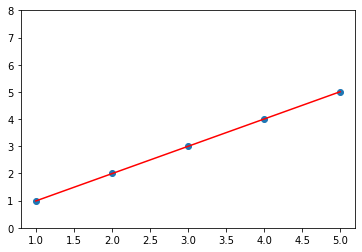

In [12]:
W=tf.Variable(2.9)
b=tf.Variable(0.5)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W*x_data+b
        cost=  tf.reduce_mean(tf.square(hypothesis-y_data))
    W_grad, b_grad = tape.gradient(cost, [W,b])#tape안의 cost와 hyporhsis의 기울기를 구함
    W.assign_sub(learning_rate * W_grad)#learning rate에 W를 곱하고 그 값을 W에 추가한다.
    b.assign_sub(learning_rate * b_grad)#learning rate에 b를 곱하고 그 값을 b에 추가한다.
    
    if i % 10 ==0:
        print("{:5} | {:10.4f} | {:10.4f} | {:10.6f}".format(i, W.numpy(),b.numpy(),cost))

plt.plot(x_data, y_data,'o')
plt.plot(x_data, hypothesis,'r-')
plt.ylim(0,8)

In [13]:
print(W*5+b)
print(W*2.5+b)

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)
